# Natural Language Processing Project

In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [11]:
yelp['text length'] = yelp['text'].apply(len)

# EDA

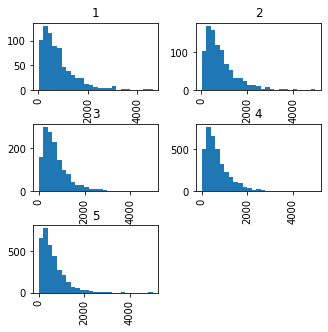

In [27]:
a = yelp.hist(column='text length', by='stars', figsize=(5,5), bins=25 )

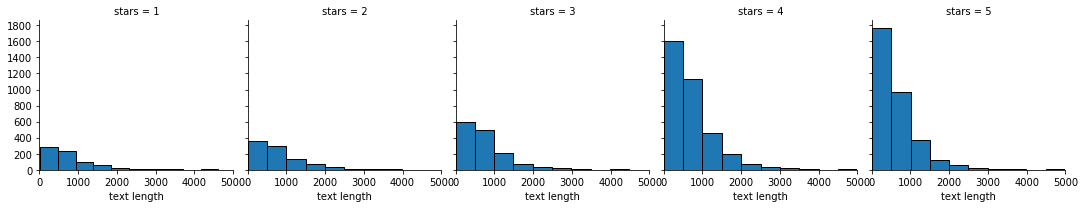

In [42]:
g = sns.FacetGrid(yelp, col="stars")
g = g.map(plt.hist, "text length", edgecolor="black")
g.set(xlim=(0,5000), yticks=range(0,2000,200))

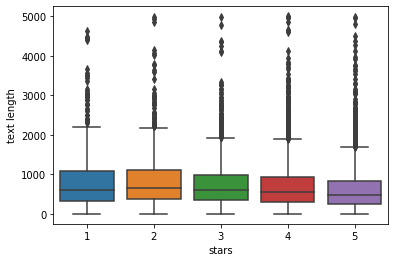

In [44]:
sns.boxplot(data=yelp, x='stars', y='text length')

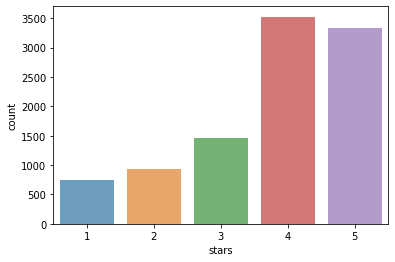

In [47]:
sns.countplot(data=yelp, x='stars', alpha=0.7)

In [68]:
stars = yelp.groupby('stars').agg(np.mean)
#yelp.groupby('stars').mean() # also possible
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [69]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


(4.0, 0.0)

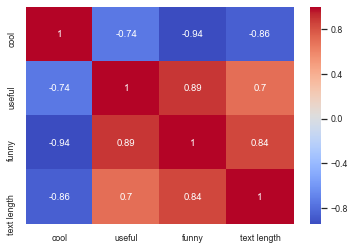

In [77]:
#plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
ax = sns.heatmap(stars.corr(), cmap='coolwarm',annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.tight_layout()

## NLP Classification Task

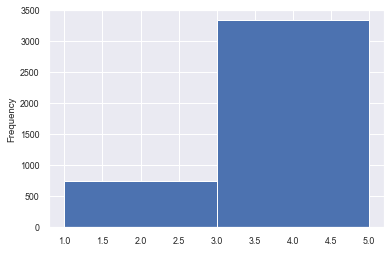

In [139]:
yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]['stars'].plot(kind='hist', bins=2)

In [215]:
X_all = yelp['text']
y_all = yelp['stars']
X = yelp_class['text']
y = yelp_class['stars']

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

In [143]:
X = vect.fit_transform(X)

In [148]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Train Test Split

In [149]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

In [151]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [218]:
nb.fit(X_train,y_train)

## Predictions and Evaluations

In [153]:
pred = nb.predict(X_test)

In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [156]:
print(accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

0.9257748776508973


[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



# Using Text Processing


In [231]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [159]:
from sklearn.pipeline import Pipeline

In [223]:
logistics = LogisticRegression()
steps = [('Vectorizer', CountVectorizer()),('Model', logistics)]
pipeline = Pipeline(steps)

## Using the Pipeline

### Train Test Split

In [219]:
X = yelp_class['text'] 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state=101) # predicting on all ratings


In [224]:
pipeline.fit(X_train,y_train)

C:\Users\rasheen1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rasheen1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('Vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('Model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                  

### Predictions and Evaluation

In [225]:
pipe_pred = pipeline.predict(X_test)

In [226]:
print(accuracy_score(y_test,pipe_pred))
print('\n')
print(confusion_matrix(y_test,pipe_pred))
print('\n')
print(classification_report(y_test,pipe_pred))

0.5006666666666667


[[102  42  22  21  33]
 [ 37  89  68  57  22]
 [ 12  46 151 160  74]
 [  7  14 124 546 373]
 [  7  16  36 327 614]]


              precision    recall  f1-score   support

           1       0.62      0.46      0.53       220
           2       0.43      0.33      0.37       273
           3       0.38      0.34      0.36       443
           4       0.49      0.51      0.50      1064
           5       0.55      0.61      0.58      1000

    accuracy                           0.50      3000
   macro avg       0.49      0.45      0.47      3000
weighted avg       0.50      0.50      0.50      3000



## SVD Predictions

In [ ]:
vect = CountVectorizer()
vect.fit(X_train)
X_train_Vect = vect.transform(X_train)

In [ ]:
# SVM Implementation through GridSearch
svc = SVC()
X_train_Vect = CountVectorizer().fit_transform(X_train)
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.001,0.0001]}
grid = GridSearchCV(svc, param_grid=param_grid,verbose=3)
grid.fit(X_train_Vect,y_train)

In [245]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [ ]:
X_test_Vect = vect.transform(X_test)
svd_pred = grid.predict(X_test_Vect)

In [246]:
print('SVD Predictions \n')
print(accuracy_score(y_test,svd_pred))
print('\n')
print(confusion_matrix(y_test,svd_pred))
print('\n')
print(classification_report(y_test,svd_pred))

SVD Predictions 

0.5253333333333333


[[102  40  12  27  39]
 [ 43  71  66  61  32]
 [ 16  42 139 174  72]
 [ 12  19  92 570 371]
 [  9  15  25 257 694]]


              precision    recall  f1-score   support

           1       0.56      0.46      0.51       220
           2       0.38      0.26      0.31       273
           3       0.42      0.31      0.36       443
           4       0.52      0.54      0.53      1064
           5       0.57      0.69      0.63      1000

    accuracy                           0.53      3000
   macro avg       0.49      0.45      0.47      3000
weighted avg       0.51      0.53      0.52      3000

